In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import pickle


This example is rather slow to run, so we will load a pre-saved model instead of doing it from scratch.
The code that was run to set up the model and do MCMC is in file `Al_5083_calibration.py`.

In [9]:
with open('data/sepia_model.pkl', 'rb') as f:
    model = pickle.load(f)

First we will look at the design:

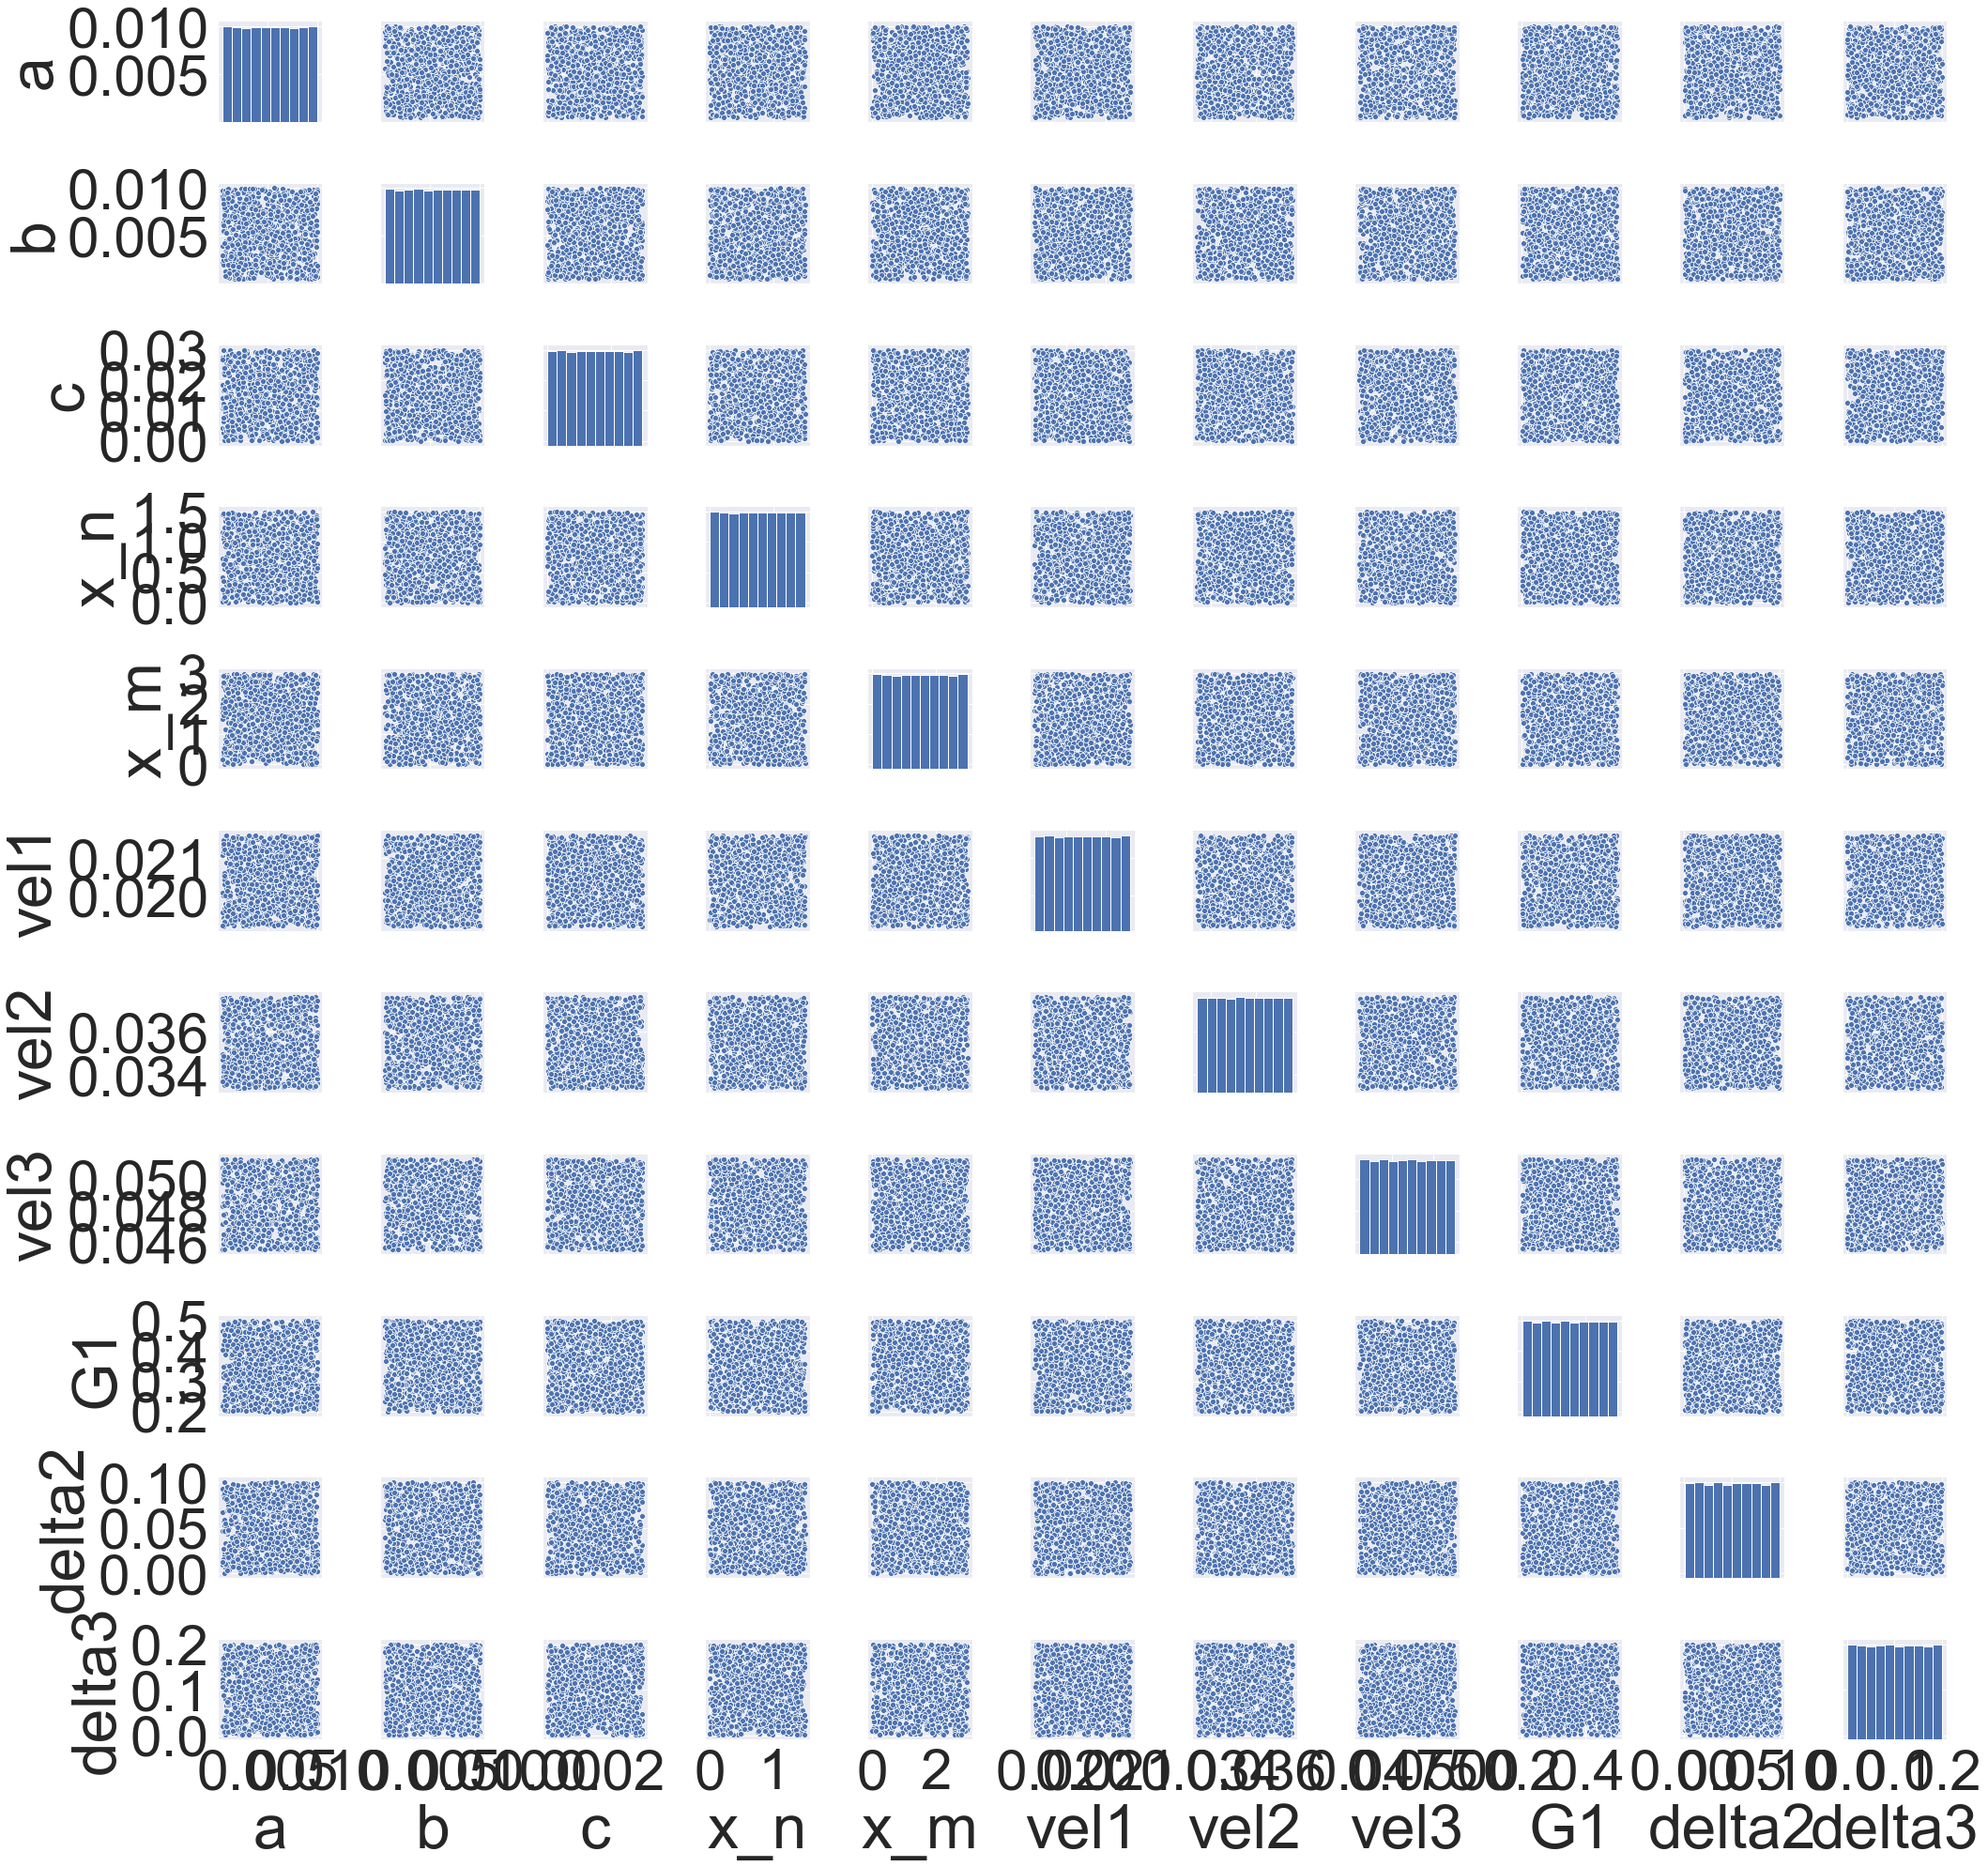

In [10]:
design = np.loadtxt('data/Al.trial5.design.txt', skiprows=1)
with open('data/Al.trial5.design.txt', 'r') as f:
    design_names = str.split(f.readline())

# Plot design
design_df = pd.DataFrame(data=design, columns=design_names)

with sns.plotting_context("notebook", font_scale=5.5):
    sns.pairplot(design_df)
plt.show()

The data consists of 12 features extracted from the original velocity curves.
We plot the simulation features as boxplots and overlay the observed data features.

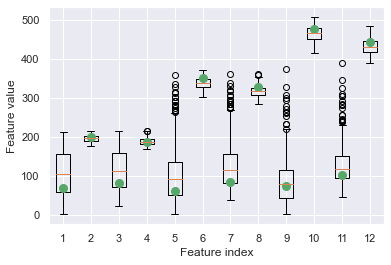

In [11]:
# Plot data
plt.boxplot(model.data.sim_data.y)
plt.plot(model.data.obs_data.y_ind, model.data.obs_data.y.T, 'go', markersize=8)
plt.ylabel('Feature value')
plt.xlabel('Feature index')
plt.show()

We extract the MCMC samples from the saved model and plot thetas:

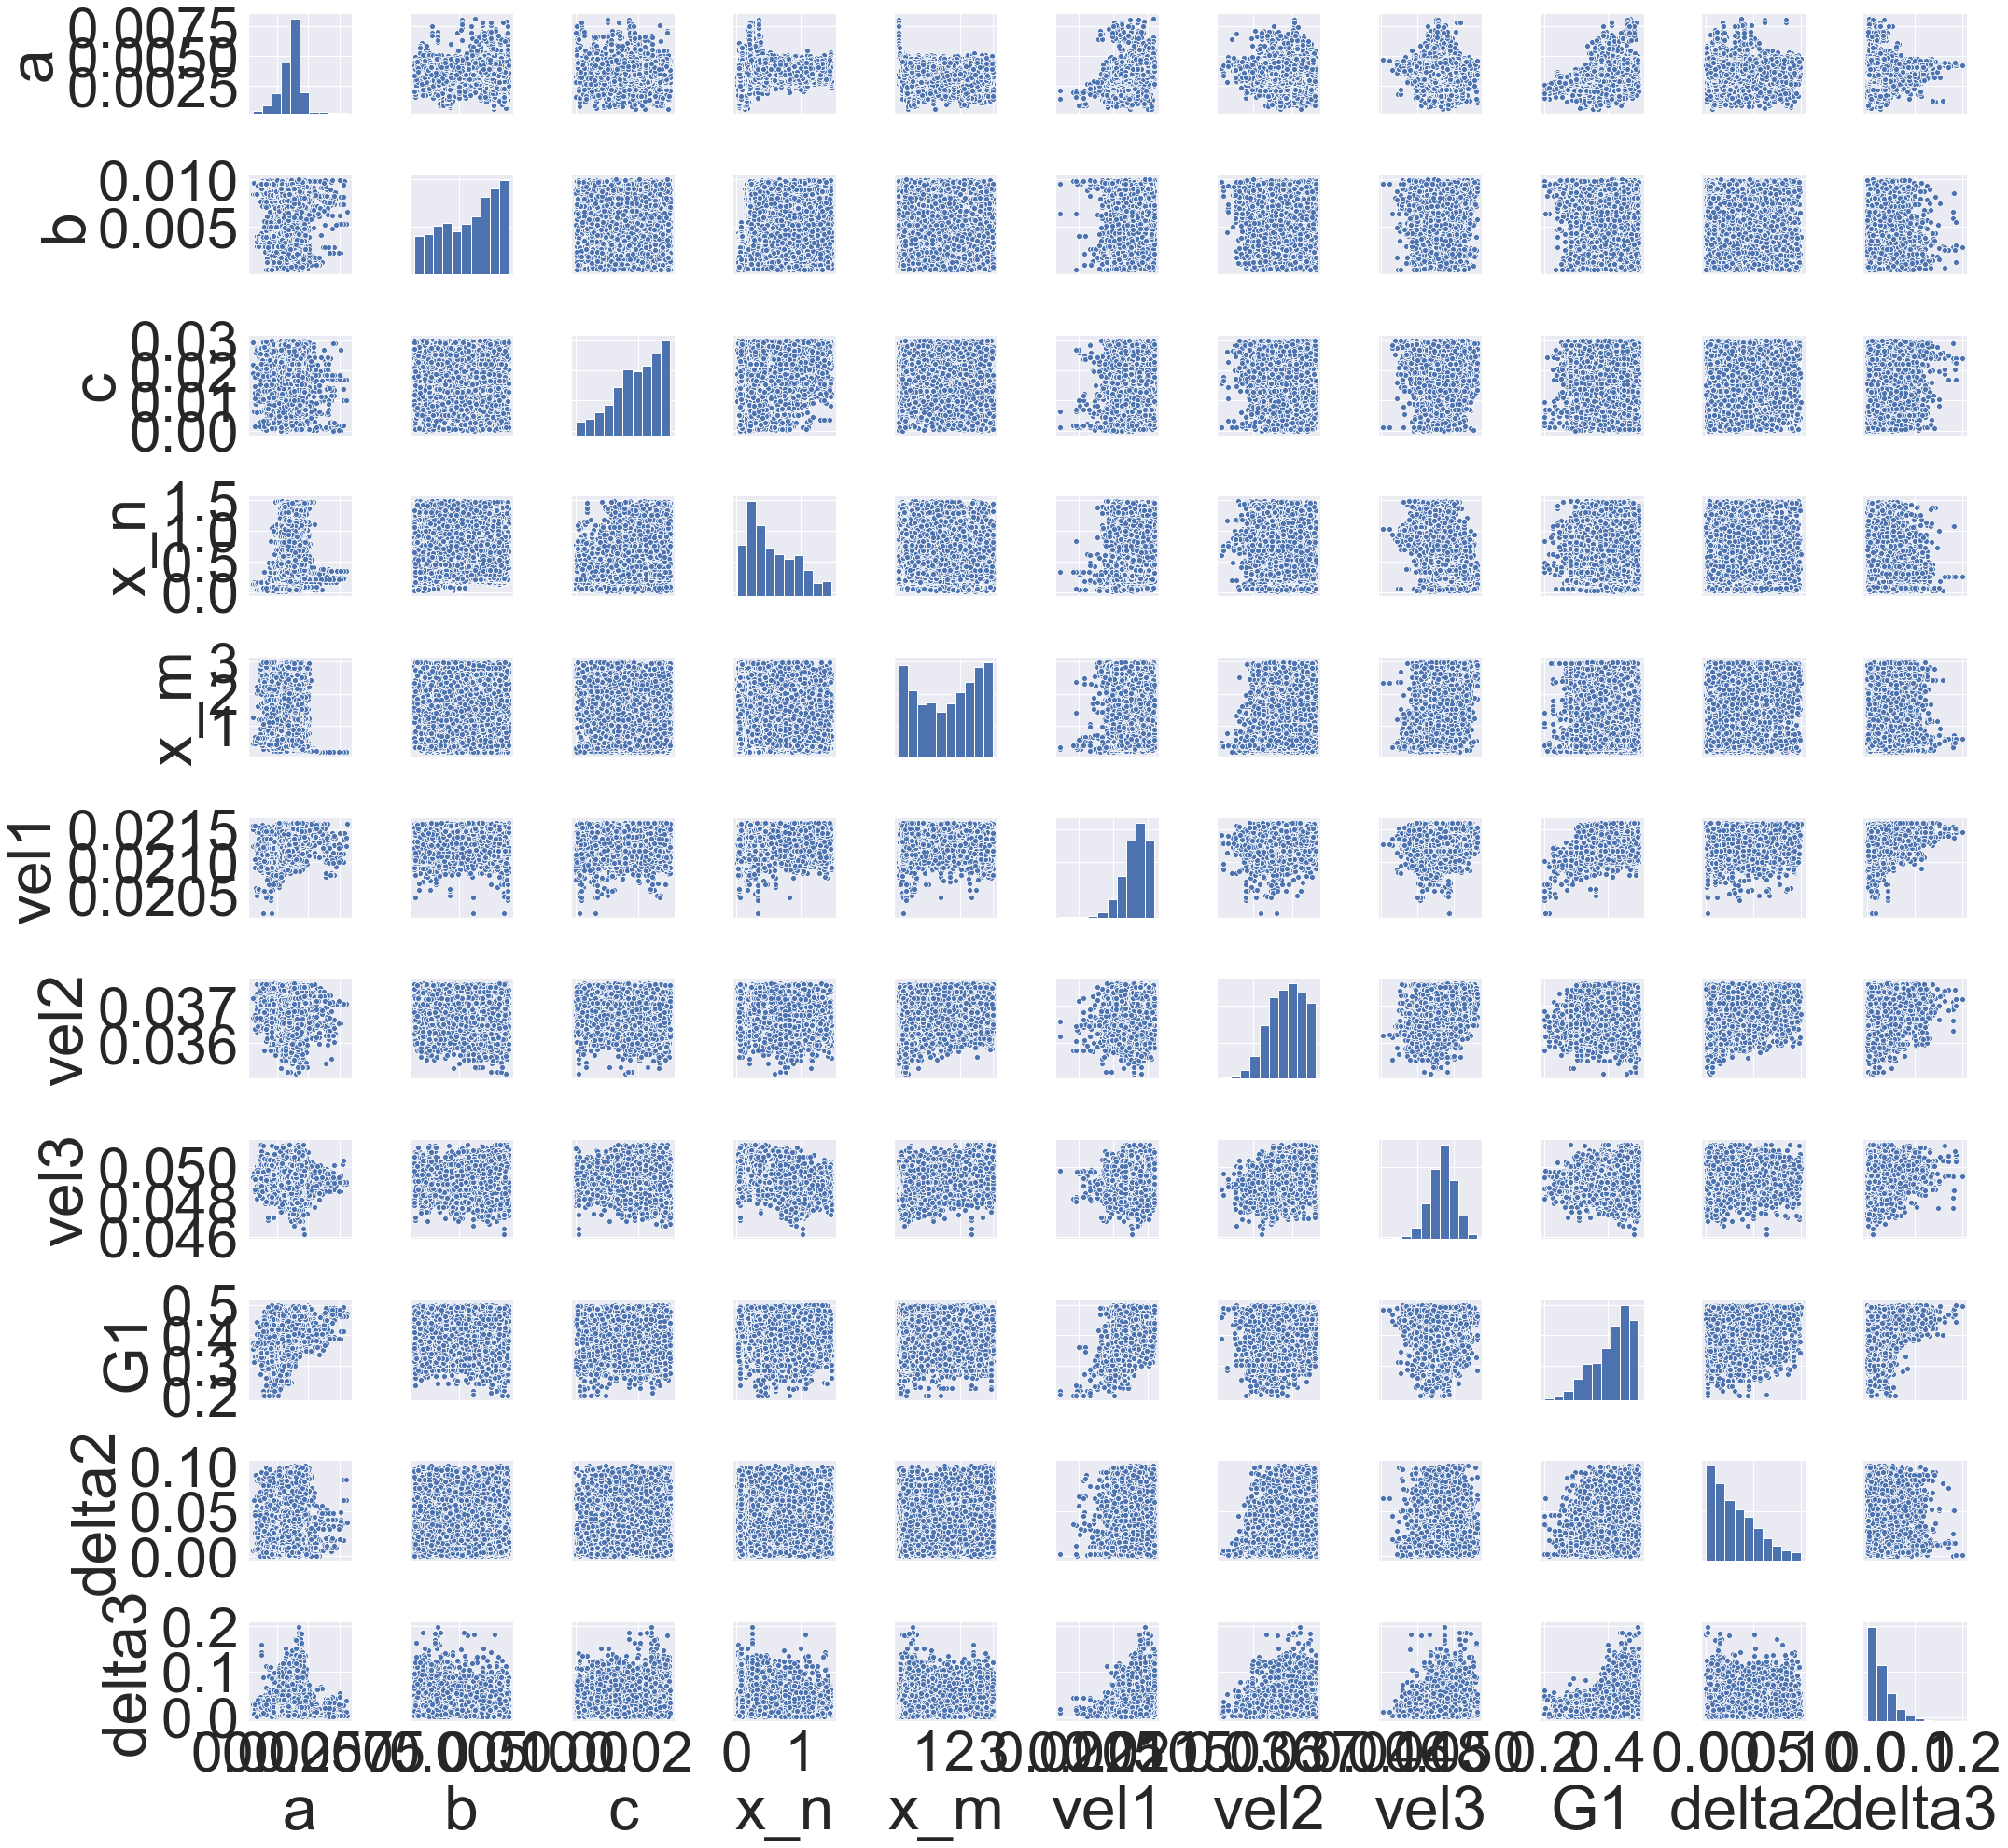

In [15]:
samples = {p.name: p.mcmc_to_array(trim=500, untransform_theta=True) for p in model.params.mcmcList}

# Pair plot of thetas
theta_df = pd.DataFrame(data=samples['theta'], columns=design_names)

with sns.plotting_context("notebook", font_scale=5.5):
    sns.pairplot(theta_df)
plt.show()